## Employment Rate_DP_LIVE

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
df = pd.read_csv("Employment Rate_DP_LIVE_27062022082715896.csv")

### Data Exploration

In [3]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EMP,MEN,THND_PER,A,1965,3346.5,NaN
1,AUS,EMP,MEN,THND_PER,A,1966,3362.5,NaN
2,AUS,EMP,MEN,THND_PER,A,1967,3412.5,NaN
3,AUS,EMP,MEN,THND_PER,A,1968,3474.0,NaN
4,AUS,EMP,MEN,THND_PER,A,1969,3548.0,NaN


In [4]:
# check shape of dataset
df.shape

(59168, 8)

There are **59168 rows & 8 columns** in dataset.

In [5]:
# check basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59168 entries, 0 to 59167
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    59168 non-null  object 
 1   INDICATOR   59168 non-null  object 
 2   SUBJECT     59168 non-null  object 
 3   MEASURE     59168 non-null  object 
 4   FREQUENCY   59168 non-null  object 
 5   TIME        59168 non-null  object 
 6   Value       59168 non-null  float64
 7   Flag Codes  1414 non-null   object 
dtypes: float64(1), object(7)
memory usage: 3.6+ MB


In [6]:
# check statisical summary of dataset
df.describe()

,Value
count,59168.000000
mean,14392.660219
std,38868.323456
min,0.000000
25%,70.600000
50%,1411.000000
75%,11226.467500
max,635247.100000


In [7]:
# check is there missing values present in dataset or not
df.isnull().sum()

LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    57754
dtype: int64

In [8]:
df.nunique()

LOCATION         46
INDICATOR         1
SUBJECT           3
MEASURE           2
FREQUENCY         3
TIME           1145
Value         53626
Flag Codes        2
dtype: int64

* here we can see lots of missing values present in Flag Codes so we have to drop it.

In [9]:
df.drop("Flag Codes", axis = 1, inplace = True)

In [10]:
df["TIME"]= pd.to_datetime(df["TIME"])

In [11]:
df['Year'] = df['TIME'].dt.year
df['Quarter'] = df['TIME'].dt.quarter
#df.drop("TIME", axis=1, inplace= True)
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Year,Quarter
0,AUS,EMP,MEN,THND_PER,A,1965-01-01,3346.5,1965,1
1,AUS,EMP,MEN,THND_PER,A,1966-01-01,3362.5,1966,1
2,AUS,EMP,MEN,THND_PER,A,1967-01-01,3412.5,1967,1
3,AUS,EMP,MEN,THND_PER,A,1968-01-01,3474.0,1968,1
4,AUS,EMP,MEN,THND_PER,A,1969-01-01,3548.0,1969,1


### Exploratory Data Analysis

* **Location**

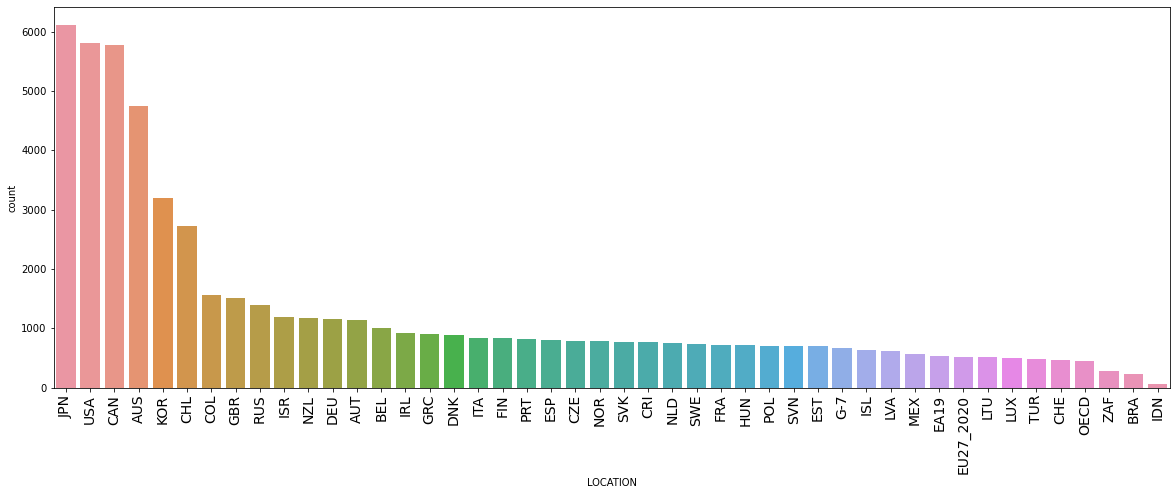

In [12]:
plt.figure(figsize=(20,7))
sns.countplot(df.LOCATION, order = df['LOCATION'].value_counts().index)
plt.xticks(rotation= 90, fontsize= 14)
plt.show()

In [13]:
df.LOCATION.value_counts()[:15]

JPN    6105
USA    5814
CAN    5765
AUS    4746
KOR    3190
CHL    2727
COL    1560
GBR    1517
RUS    1400
ISR    1188
NZL    1179
DEU    1155
AUT    1140
BEL    1000
IRL     915
Name: LOCATION, dtype: int64

* Here we can see the counts of Japan, USA & Canada is more as compare to other Locations.

* **Subject**

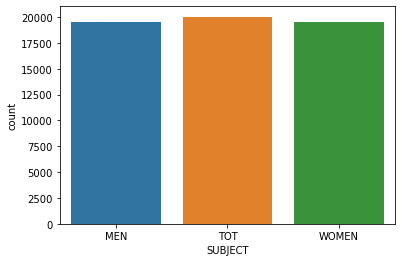

TOT      20044
WOMEN    19564
MEN      19560
Name: SUBJECT, dtype: int64

In [14]:
sns.countplot(df.SUBJECT)
plt.show()

df.SUBJECT.value_counts()

* Here we see Subject TOT is more than the MEN & WOMEN.

* **Measure**

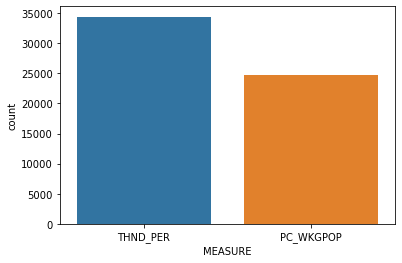

THND_PER     34396
PC_WKGPOP    24772
Name: MEASURE, dtype: int64

In [15]:
sns.countplot(df.MEASURE)
plt.show()

df.MEASURE.value_counts()

* Here we see two types of Measure **1. THND_PER 2. PC_WKGPOP**
* Value counts of THND_PER is 34396 & PC_WKGPOP  is 24772.

* **FREQUENCY**

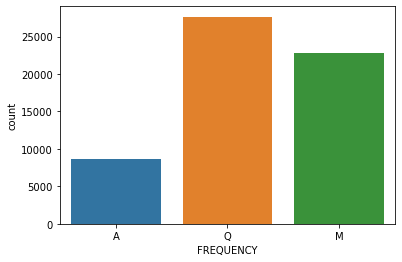

Q    27646
M    22822
A     8700
Name: FREQUENCY, dtype: int64

In [16]:
sns.countplot(df.FREQUENCY)
plt.show()

df.FREQUENCY.value_counts()

* Three types of FREQUENCY **1. A for Annual 2. Q for Quarter 3. M for Months.
* Value counts of Q is higher than other frequencies.

* **Value**

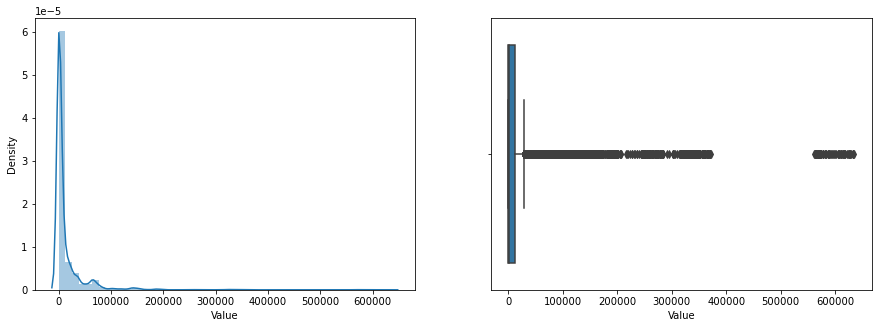

In [17]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df["Value"])

plt.subplot(1,2,2)
sns.boxplot(df["Value"])

plt.show()

* Here we can see some outliers present in the dataset `Value` feature. so we have to remove it.

* **Bivariate Analysis**

* **Frequency vs Subject**

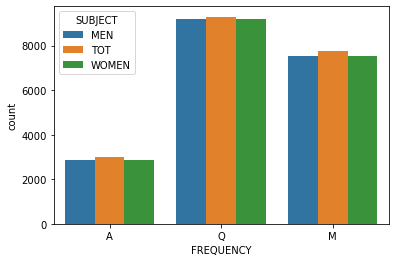

In [18]:
sns.countplot(df.FREQUENCY, hue=df.SUBJECT)
plt.show()


* frequncy of Men and Women is near about same in annual, quarter & monthly basis.

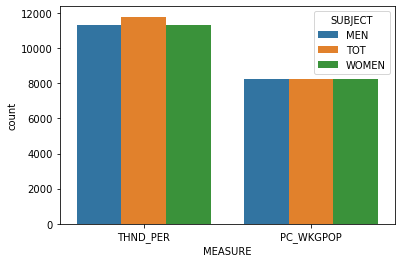

In [19]:
sns.countplot(df.MEASURE, hue=df.SUBJECT)
plt.show()


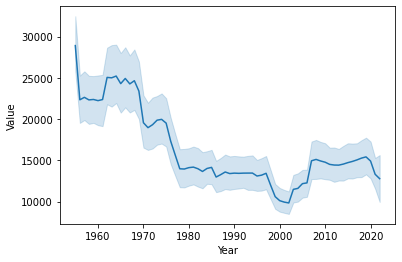

In [20]:
sns.lineplot(x=df.Year, y= df.Value)
plt.show()

* **Find annual Employment rate with respect to subject**

In [21]:
def annual_emp_rate(country, measure, title):
    x= df[(df["FREQUENCY"]=="A") & (df["LOCATION"]==country) & (df["MEASURE"]==measure) & (df["SUBJECT"]=="MEN")]
    y=df[(df["FREQUENCY"]=="A") & (df["LOCATION"]==country) & (df["MEASURE"]==measure) & (df["SUBJECT"]=="WOMEN")]
    z=df[(df["FREQUENCY"]=="A") & (df["LOCATION"]==country) & (df["MEASURE"]==measure) & (df["SUBJECT"]=="TOT")]
    
    plt.figure(figsize=(20,7))
    sns.lineplot(x= "Year", y= "Value", data= x, label ="MEN")
    sns.lineplot(x= "Year", y= "Value", data= y, label ="WOMEN")
    sns.lineplot(x= "Year", y= "Value", data= z, label ="TOT")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    

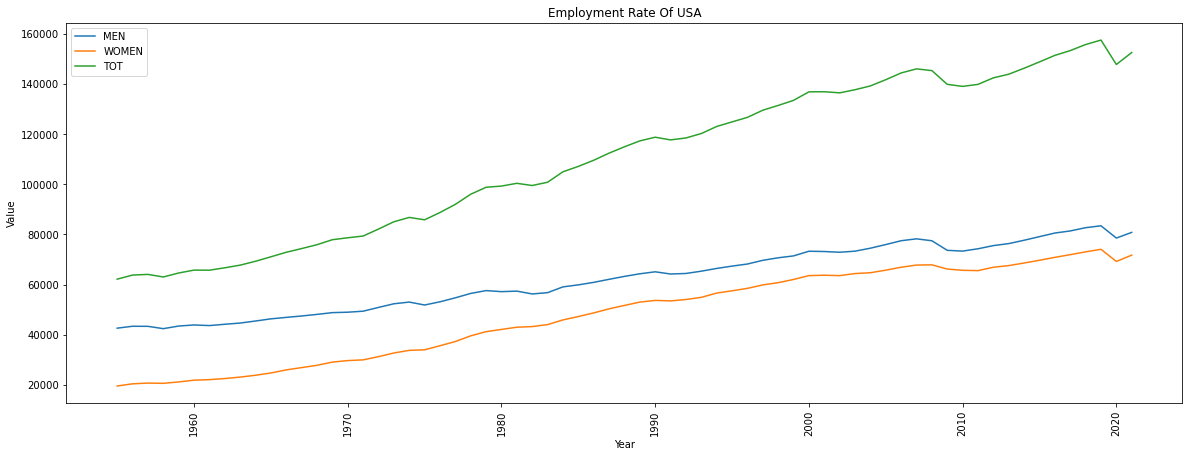

In [22]:
# study annual emp rate of USA
annual_emp_rate("USA", "THND_PER", "Employment Rate Of USA")

* Above graph shows employment rate is increased per year. 